In [85]:
import numpy as np
import gensim
import re
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
f = open('../data/input.txt')
ds = f.read()
f.close()

In [38]:
syms = ['"', ';', ':', ',', '?', '!', '&', '(', ')', '[', ']', "'", '$', '@', '~', '-', '#']
syms_2 = ['\n', '\t', '_', '>', '<']



In [47]:
data = []
for ix in ds.split('.')[:]:
    val = ix
    for s in syms:
        val = val.strip().replace(s, '')
    for s in syms_2:
        val = val.strip().replace(s, ' ')
    if len(val) < 500 and len(val) > 40:
        data.append(val)

In [34]:
# f = np.unique(data, return_counts=True)

In [36]:
#plt.figure(0, figsize=(10, 10))
#plt.plot(f[0], f[1])

In [55]:
train = []
for ix in data[:]:
    train.append(ix.lower().split())
    #print '-'*80

In [59]:
model = gensim.models.Word2Vec(train, workers=6, iter=20)

In [117]:
model.similar_by_word('mystery')

[('affair', 0.7701476812362671),
 ('problem', 0.7476425170898438),
 ('investigation', 0.6302639245986938),
 ('incident', 0.6289407014846802),
 ('instance', 0.6138631105422974),
 ('business', 0.6063700914382935),
 ('chain', 0.5894591808319092),
 ('episode', 0.5805294513702393),
 ('object', 0.5788438320159912),
 ('proof', 0.5696870684623718)]

In [138]:
w = 'horse car engine'.split()
# model.similarity?

In [139]:
m = np.zeros((len(w), len(w)))
for ix in range(len(w)):
    for wx in range(len(w)):
        m[ix, wx] = model.similarity(w[ix], w[wx])

['horse', 'car', 'engine']


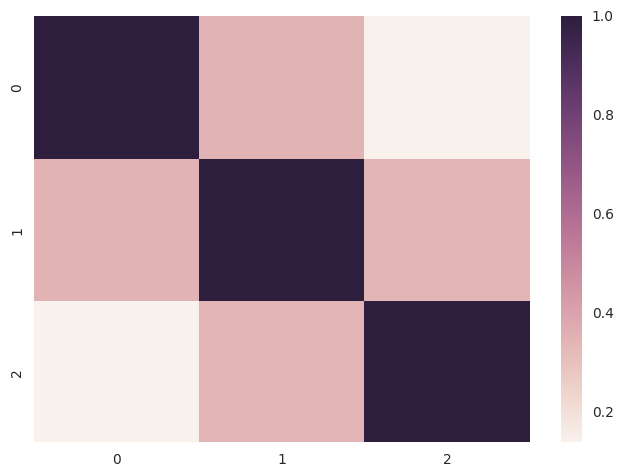

In [140]:
print w
sns.heatmap(m)

In [134]:
m.sum(axis=0)

array([ 2.50067185,  2.32342875,  1.73701952,  2.25684862])

In [141]:
import spacy

In [142]:
word_embeddings = spacy.load('en', vectors='glove.6B.300d.txt')

In [160]:
q = word_embeddings(u'what')

In [162]:
from sklearn.metrics.pairwise import cosine_similarity

In [163]:
def sim(w1, w2):
    v1 = word_embeddings(w1)
    v2 = word_embeddings(w2)
    
    return cosine_similarity(v1.vector, v2.vector)

In [171]:
word1 = u'money'
word2 = u'bank'
print sim(word1, word2)

[[ 0.56668288]]


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
